# 크루스칼 알고리즘 코드 작성

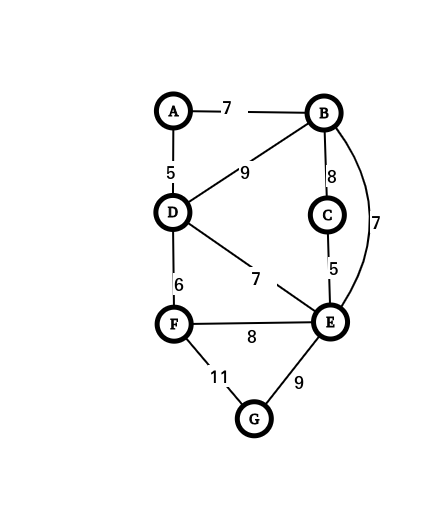

In [12]:
graph = {
    'vertices': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'edges': [
        (7, 'A', 'B'),
        (7, 'B', 'A'),
        (5, 'A', 'D'),
        (5, 'D', 'A'),
        (9, 'B', 'D'),
        (9, 'D', 'B'),
        (8, 'B', 'C'),
        (8, 'C', 'B'),
        (7, 'B', 'E'),
        (7, 'E', 'B'),
        (5, 'C', 'E'),
        (5, 'E', 'C'),
        (6, 'D', 'F'),
        (6, 'F', 'D'),
        (7, 'D', 'E'),
        (7, 'E', 'D'),
        (8, 'E', 'F'),
        (8, 'F', 'E'),
        (9, 'E', 'G'),
        (9, 'G', 'E'),
        (11, 'F', 'G'),
        (11, 'G', 'F'),
    ]
}

In [13]:
graph['edges'].sort(key=lambda x:x[0])

In [14]:
from pprint import pprint
pprint(graph)

{'edges': [(5, 'A', 'D'),
           (5, 'D', 'A'),
           (5, 'C', 'E'),
           (5, 'E', 'C'),
           (6, 'D', 'F'),
           (6, 'F', 'D'),
           (7, 'A', 'B'),
           (7, 'B', 'A'),
           (7, 'B', 'E'),
           (7, 'E', 'B'),
           (7, 'D', 'E'),
           (7, 'E', 'D'),
           (8, 'B', 'C'),
           (8, 'C', 'B'),
           (8, 'E', 'F'),
           (8, 'F', 'E'),
           (9, 'B', 'D'),
           (9, 'D', 'B'),
           (9, 'E', 'G'),
           (9, 'G', 'E'),
           (11, 'F', 'G'),
           (11, 'G', 'F')],
 'vertices': ['A', 'B', 'C', 'D', 'E', 'F', 'G']}


In [20]:
parent = dict()
rank = dict()

def make_set(node):
    parent[node] = node
    rank[node] = 0
    
def find(node):
    # path compression
    
    # 루트 노드가 아닐 때!
    if parent[node] != node:
        parent[node] = find(parent[node])
    return parent[node]

def union(node_v, node_u):
    root1 = find(node_v)
    root2 = find(node_u)
    
    # union by rank
    if rank[root1] > rank[root2]:
        parent[root2] = root1
    else:
        parent[root1] = root2
        
        if rank[root1] == rank[root2]:
            rank[root1] += 1
            

def kruskal(graph):
    mst = list()
    
    # 1. 초기화
    for node in graph['vertices']:
        make_set(node)
    
    # 2. 간선 weight 기반 sorting
    graph['edges'].sort(key=lambda x:x[0])
    edges = graph['edges']
    
    # 3. 간선 연결(find, union)
    for edge in edges:
        weight, node_v, node_u = edge
        if find(node_v) != find(node_u):
            union(node_v, node_u)
            mst.append(edge)
    return mst

In [17]:
parent = dict()
rank = dict()
for node in graph['vertices']:
        make_set(node)

In [18]:
parent

{'A': 'A', 'B': 'B', 'C': 'C', 'D': 'D', 'E': 'E', 'F': 'F', 'G': 'G'}

In [19]:
rank

{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0}

In [21]:
mygraph = {
    'vertices': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'edges': [
        (7, 'A', 'B'),
        (7, 'B', 'A'),
        (5, 'A', 'D'),
        (5, 'D', 'A'),
        (9, 'B', 'D'),
        (9, 'D', 'B'),
        (8, 'B', 'C'),
        (8, 'C', 'B'),
        (7, 'B', 'E'),
        (7, 'E', 'B'),
        (5, 'C', 'E'),
        (5, 'E', 'C'),
        (6, 'D', 'F'),
        (6, 'F', 'D'),
        (7, 'D', 'E'),
        (7, 'E', 'D'),
        (8, 'E', 'F'),
        (8, 'F', 'E'),
        (9, 'E', 'G'),
        (9, 'G', 'E'),
        (11, 'F', 'G'),
        (11, 'G', 'F'),
    ]
}

In [22]:
kruskal(mygraph)

[(5, 'A', 'D'),
 (5, 'C', 'E'),
 (6, 'D', 'F'),
 (7, 'A', 'B'),
 (7, 'B', 'E'),
 (9, 'E', 'G')]